# **Exercise Sheet 6:** Deep Learning

# Part A: Foundations & Concepts

Before you start coding and building deep learning models, take some time to consider the fundamental concepts and motivations behind neural networks and deep learning techniques.

Reflect on these ideas independently before consulting resources like ChatGPT or other online tools. Discussing your thoughts with classmates is also highly encouraged!

## 1. Deep learning neurons and activiation functions

### a) Draw a simple deep learning neuron
- The neuron receives three inputs: [3, 5, 2]
- The weights are: [2, 1, 0.5]
- There is a bias: 2
- How is the output computed (not considering an activiation function)?

![Simple Neuron](./imgs/simple_Neuron_1.png)

#### Your Answer:

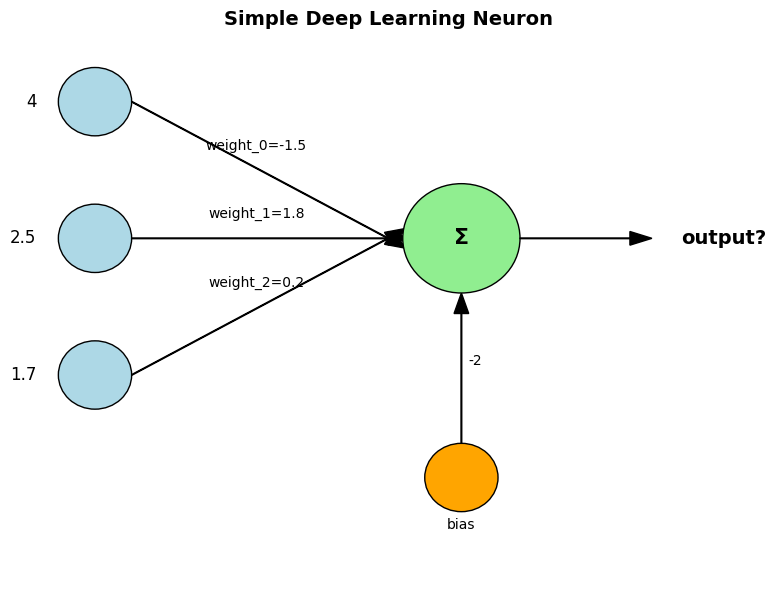

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_simple_neuron():
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # Input values and weights
    inputs = [4, 2.5, 1.7]#[3, 5, 2]
    weights = [-1.5, 1.8, 0.2]#[2, 1, 0.5]
    bias = -2#2
    
    # Draw input nodes
    for i, inp in enumerate(inputs):
        y_pos = 0.7 - i * 0.2
        circle = patches.Circle((0.1, y_pos), 0.05, facecolor='lightblue', edgecolor='black')
        ax.add_patch(circle)
        ax.text(0.02, y_pos, f'{inp}', ha='right', va='center', fontsize=12)
        
        # Draw arrows with weights
        ax.arrow(0.15, y_pos, 0.35, 0.5-y_pos, head_width=0.02, head_length=0.03, fc='black')
        ax.text(0.32, y_pos + (0.55-y_pos)/2, f'weight_{i}={weights[i]}', ha='center', va='bottom', fontsize=10)
    
    # Draw bias node
    bias_circle = patches.Circle((0.6, 0.15), 0.05, facecolor='orange', edgecolor='black')
    ax.add_patch(bias_circle)
    ax.text(0.6, 0.08, 'bias', ha='center', va='center', fontsize=10)
    
    # Draw bias arrow
    ax.arrow(0.6, 0.2, 0, 0.19, head_width=0.02, head_length=0.03, fc='black')
    ax.text(0.61, 0.32, f'{bias}', ha='left', va='center', fontsize=10)
    
    # Draw neuron
    neuron = patches.Circle((0.6, 0.5), 0.08, facecolor='lightgreen', edgecolor='black')
    ax.add_patch(neuron)
    ax.text(0.6, 0.5, 'Σ', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Draw output
    ax.arrow(0.68, 0.5, 0.15, 0, head_width=0.02, head_length=0.03, fc='black')
    
    ax.text(0.9, 0.5, f'output?', ha='left', va='center', fontsize=14, fontweight='bold')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.8)
    ax.axis('off')
    ax.set_title('Simple Deep Learning Neuron', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

draw_simple_neuron()


#### Solution:

The output of the neuron is calculated step by step as follows:

| Input ($x_i$) | Weight ($w_i$) | Product ($x_i \times w_i$) |
|:---------------:|:----------------:|:----------------------------:|
| 3               | 2                | 6                            |
| 5               | 1                | 5                            |
| 2               | 0.5              | 1                            |
| **Bias**        |                  | 2                            |
| **Total**       |                  | **14**                       |

In formula form:

$$
\text{output} = (3 \times 2) + (5 \times 1) + (2 \times 0.5) + 2 = 6 + 5 + 1 + 2 = 14
$$

### b) What is the output if we add a ReLU activation function?

*Note:* If you were not able to compute the output in the previous question, continue with 10 for the output.

$$
\text{ReLU}(x) = \max(0, x)
$$
![ReLU Function](imgs/Simple_ReLU.png)

#### Your Answer:

#### Solution:
In classic neural networs, the activiation function is applied after aggregating the weighted inputs and adding the bias, leading to the forumla:

$$
\text{output} = \text{activitation}\left(\sum_{i=1}^{n} (x_i \cdot w_i) + b\right)
$$

The ReLU activation function outputs the maximum of 0 and the input value. Therefore, if the output from the previous step is 14, applying ReLU gives:
$$
\text{ReLU}(14) = \max(0, 14) = 14
$$

### c) What would the output be after the activiation function with the new parameters?
- Input: [4, 2.5, 1.7]
- Weights: [-1.5, 1.8, 0.2]
- Bias: -2

![Simple Neuron2](./imgs/simple_Neuron_2.png)

#### Your Answer

#### Solution

| Input ($x_i$) | Weight ($w_i$) | Product ($x_i \times w_i$) |
|:-------------:|:--------------:|:--------------------------:|
| 4             | -1.5           | -6.0                       |
| 2.5           | 1.8            | 4.5                        |
| 1.7           | 0.2            | 0.34                       |
| **Bias**      |                | -2                         |
| **Total (before activation)** | | **-3.16**                 |
| **ReLU Output** |              | $\max(0, -3.16) = 0$       |

The output is 0.

### d) How can we build complex function (such as waves) out of this simple function?
- What do you need to achieve this?
- How do positive and negative weights and their value manipulate the function?
- What does changing the bias influence?

#### Your Answer:

#### Solution:
- To build complex functions like waves, we can stack multiple neurons (layers) together.
- Positive/Negative weights: Control direction of the diagonal ReLU segment
- Higher/Lower weights: Control steepness of the diagonal segment
- Bias: Shifts the start of the segment

By combining many ReLU's with different weights and biases, we can approximate complex functions ussch as curves and waveforms.

### e) How many ReLU's are needed to fit this line?

![ReLU Line](imgs/Stacked_ReLU.png)

#### Your Answer:

#### Solution
We need 3 ReLU's to fit this line. One for the first ascend, another one that balances it once it gets flat and a third that lets it descend.

### f) Take a pen and draw the ReLU functions that we need to fit the line above.

#### Your Answer:

#### Solution

![ReLU Functions](imgs/individual_ReLU.png)

## 2. Loss and Gradient Descent

### a) What does a loss function reflect? What is a possible loss function for Linear regression?


#### Your Answer:

#### Solution:
- The loss function reflects the difference between the prediction and actual outcome that we aim to minimize.
- In linear regression, the most common loss function is ordinary least squares (OLS), which minimizes the sum of squared errors (SSE) between the predicted values and the actual data points. This is also known as Mean Squared Error (MSE) when averaged over all points.

### b) Conceptually, what does the loss in binary classification aims to minimize?

#### Your Answer:

#### Solution:
- In binary classification, the loss function aims to minimize the difference between the predicted probabilities of the two classes and the actual class labels. So for class 1, the predicted probability should be close to 1, and for class 0 vice versa.

### c) Look at the loss landscape below and indicate where the minimal loss is located.

![Loss Landscape](imgs/loss_landscape.png)

#### Your Anwer:

#### Solution:

Note maybe we update this for better teaching opportunities

In general it's difficult to get the value reliably from the 3d plot, however the contour plot is easier to interpret. We see tha there are three regions with low loss (around (1.5, -2.5), (1.5, 2.5) and (-1.5, 0)). The Minimum is found around (-1.5, 0).

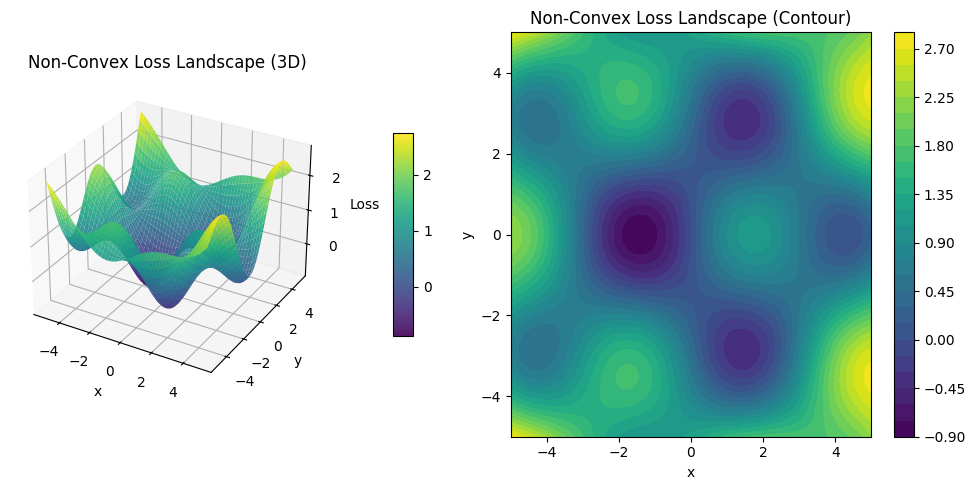

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a non-convex loss function (e.g., a "double well" or Rastrigin-like)
def loss(x, y):
    return np.sin(x) * np.cos(y) + 0.05 * (x**2 + y**2)

# Generate grid
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = loss(X, Y)

# 3D Surface Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_title('Non-Convex Loss Landscape (3D)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Loss')
cbar3d = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.15)
#cbar3d.set_label('Loss Value')

# Contour Plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, Z, levels=30, cmap='viridis')
ax2.set_title('Non-Convex Loss Landscape (Contour)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()

### d) What is the concept behind gradient descent?
- How do we initialize weights?
- How do we update them?

#### Your Answer:

#### Solution:
- The concept behind gradient descent is to iteratively adjust the weights of a model in the direction that reduces the loss function. It is like following the slope of a hill to find the lowest point.
- Weights are typically initialized randomly, however there are also more advanced techniques.
- We update weights by calculating the gradient of the loss function with respect to each weight of the model and then make a step based on the learning rate in the opposite direction (the gradient points uphill).

### e) Look again at the loss landscape. Are there possible issues depending on our start location?
- Do we always find the optimal solution?

#### Your Answer:

#### Solution:
- As we have described before, we see multiple regions with lower loss values that are not connected.
- This means depending on the start location, we might end up in a different minimal loss region (local minimia).
- This can lead to suboptimal solutions since we might not reach the are with the lowest loss value (global minimum).

### f) What does learning rate reflect in gradient descent?

#### Your Answer:

#### Solution:
- The learning rate reflects the size of the step we take in the direction of the gradient during each update of the weights. It determines how quickly or slowly we converge to the minimum of the loss function.
- Small learning rate: Converges slowly, may get stuck in local minima
- Large learning rate: May overshoot the minimum, leading to divergence or oscillation around the minimum.

### g) Look at the following plot of different learning rates.
- What do you observe?
- Which learning rate would be preferred and why?

![Learning Rate Plot](imgs/learning_rates.png)

#### Your Answer:

#### Solution:

- We observe the loss convergence for three different learning rates in the plot.
- LR = 0.01: Converges slowly, oscillation is low, but takes a long time to reach the minimum.
- LR = 0.5: Converges faster, oscillation is slightly higher, but reaches a low loss value quickly
- LR = 2: Oscillates heavily around the minimum.

In this case the learning rate of 0.5 is preferred as it converges quickly without excessive oscillation.

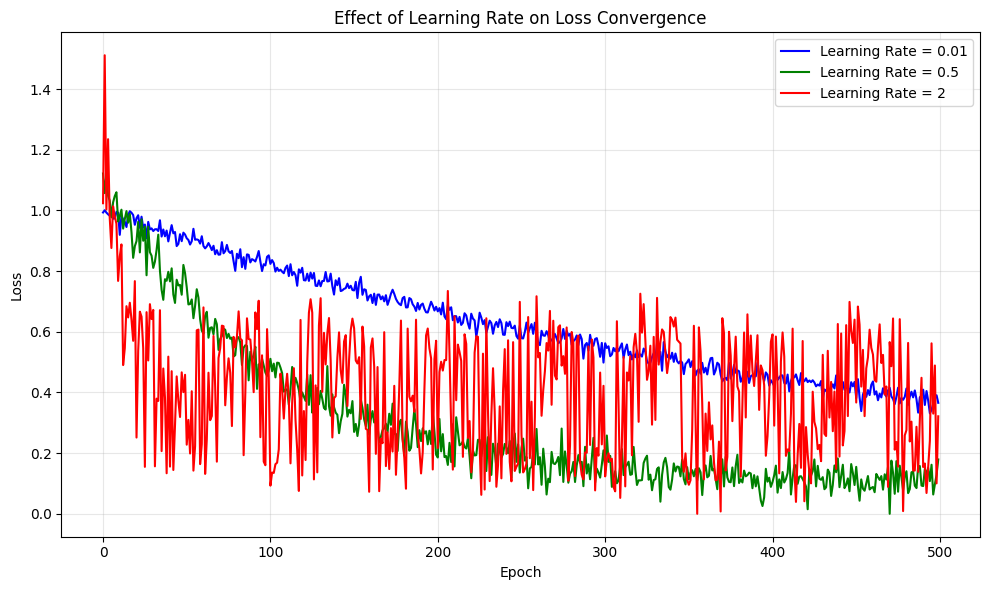

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate "loss" values for 3 different learning rates over 1000 epochs
epochs = np.arange(500)

# Small learning rate: slow, steady decrease, doesn't reach minimum
loss_small = 1.0 * np.exp(-0.002 * epochs) + 0.02 * np.random.randn(len(epochs))

# Good learning rate: fast decrease, smooth convergence to minimum
loss_good = 1.0 * np.exp(-0.01 * epochs) + 0.04 * np.random.randn(len(epochs))

# Large learning rate: irregular oscillations and possible divergence
loss_large = 1.0 * np.exp(-0.13 * epochs) \
    + 0.25 * np.sin(0.1 * epochs + np.random.uniform(-2, 2, len(epochs))) \
    + 0.05 * np.random.randn(len(epochs)) \
    + 0.05 * np.random.randn(len(epochs)).cumsum() / len(epochs)  # add some drift

# Ensure all losses are non-negative by shifting them
# Find the minimum value in each loss array
min_small = loss_small.min()
min_good = loss_good.min()
min_large = loss_large.min()

# Shift each array so its minimum is 0
loss_small -= min_small if min_small < 0 else 0
loss_good -= min_good if min_good < 0 else 0
loss_large -= min_large if min_large < 0 else 0

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_small, label='Learning Rate = 0.01', color='blue')
plt.plot(epochs, loss_good, label='Learning Rate = 0.5', color='green')
plt.plot(epochs, loss_large, label='Learning Rate = 2', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Loss Convergence')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

### h) Assume the model was trained on all available training data. In which epoch would you stop the training of the model?
- Are there issues if we continue training for another 500 epochs?

#### Your Answer:

#### Solution:
- Based on the plot above, training more after epoch 300 seems to not improve the performance of the model significantly.
- Continuing training for another 500 epochs could lead to overfitting, where the model learns noise in the training data rather than generalizing well to unseen data.

# Part B: Coding & Visualization

Now let's put our understanding of deep learning algorithms into practice! We'll begin by importing the necessary libraries.

Hint: You may find the provided helper functions useful for some tasks, but you are welcome to write your own

## Notes:
- I'd change the language model task from the handson to a classification task as we done here and then we can showcase all functions etc. there and use them here

## 3. Multi-Layer Perceptron (MLP)

In [4]:
# Imports
import pandas as pd
from helper import plot_loss_curves
from helper import prepare_data_for_mlp
from helper import SimpleMLP
from helper import train_model
from helper import plot_training_loss
from helper import evaluate_classification_model
import warnings
warnings.filterwarnings("ignore")


### a) Load the dataset `phoneme.csv` and explore it.
- What outcome do you want to predict? How many classes are available?
- What predictors are available?

In [5]:
# Student Code

In [6]:
# Solution
df = pd.read_csv('phoneme.csv')

In [7]:
print(df.shape)
df.head()

(4509, 257)


,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,phoneme
0,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,...,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh
1,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,...,8.91567,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy
2,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,...,6.49345,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl
3,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,...,5.36506,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl
4,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,...,7.74256,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa


In [8]:
# Check the features and outcomes
print("Features:")
print(df.columns.tolist())

Features:
['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10', 'x.11', 'x.12', 'x.13', 'x.14', 'x.15', 'x.16', 'x.17', 'x.18', 'x.19', 'x.20', 'x.21', 'x.22', 'x.23', 'x.24', 'x.25', 'x.26', 'x.27', 'x.28', 'x.29', 'x.30', 'x.31', 'x.32', 'x.33', 'x.34', 'x.35', 'x.36', 'x.37', 'x.38', 'x.39', 'x.40', 'x.41', 'x.42', 'x.43', 'x.44', 'x.45', 'x.46', 'x.47', 'x.48', 'x.49', 'x.50', 'x.51', 'x.52', 'x.53', 'x.54', 'x.55', 'x.56', 'x.57', 'x.58', 'x.59', 'x.60', 'x.61', 'x.62', 'x.63', 'x.64', 'x.65', 'x.66', 'x.67', 'x.68', 'x.69', 'x.70', 'x.71', 'x.72', 'x.73', 'x.74', 'x.75', 'x.76', 'x.77', 'x.78', 'x.79', 'x.80', 'x.81', 'x.82', 'x.83', 'x.84', 'x.85', 'x.86', 'x.87', 'x.88', 'x.89', 'x.90', 'x.91', 'x.92', 'x.93', 'x.94', 'x.95', 'x.96', 'x.97', 'x.98', 'x.99', 'x.100', 'x.101', 'x.102', 'x.103', 'x.104', 'x.105', 'x.106', 'x.107', 'x.108', 'x.109', 'x.110', 'x.111', 'x.112', 'x.113', 'x.114', 'x.115', 'x.116', 'x.117', 'x.118', 'x.119', 'x.120', 'x.121', 'x.122',

In [9]:
# Get unique values for categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in phoneme: ['sh' 'iy' 'dcl' 'aa' 'ao']


In [10]:
# Prepare data for modeling
X = df.drop(columns=["phoneme"])
y = df["phoneme"]


### b) Prepare the data for the model.

*Hint:* Use `prepare_data_for_mlp` from the helper functions.

In [11]:
# Student Code

In [12]:
# Prepare data for MLP
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = prepare_data_for_mlp(X, y, task_type='classification')

X_train: torch.Size([3607, 256]), y_train: torch.Size([3607])
X_test: torch.Size([902, 256]), y_test: torch.Size([902])


### c) Build a Multi-Layer Perceptron (MLP) model.

- Use 1 hidden layer with 100 neurons.
- Use SGD with learning rate 0.001.
- Plot the learning curve (loss over epochs) for both training and test data.
- Did the model learn well? What is the accuracy?

In [13]:
# Student Code

In [14]:
# Define Model
input_size = X.shape[1]
output_size = len(y.unique())
hidden_size = 100
layers = 1

model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=layers)

In [15]:
# Train the model with default params
learning_rate = 0.001

train_loss, test_loss, test_accuracy = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     1.4475 |    1.3826 |   0.5710 | 0.001000
   20 |     0.3401 |    0.3690 |   0.8936 | 0.001000
   40 |     0.2266 |    0.2555 |   0.9047 | 0.001000
   60 |     0.1949 |    0.2246 |   0.9102 | 0.001000
   80 |     0.1799 |    0.2108 |   0.9146 | 0.001000
  100 |     0.1703 |    0.2027 |   0.9169 | 0.001000
  120 |     0.1639 |    0.1974 |   0.9180 | 0.001000
  140 |     0.1579 |    0.1936 |   0.9180 | 0.001000
  160 |     0.1534 |    0.1909 |   0.9202 | 0.001000
  180 |     0.1497 |    0.1886 |   0.9224 | 0.001000
  200 |     0.1459 |    0.1871 |   0.9224 | 0.001000
Training completed!
Final test accuracy: 0.9224


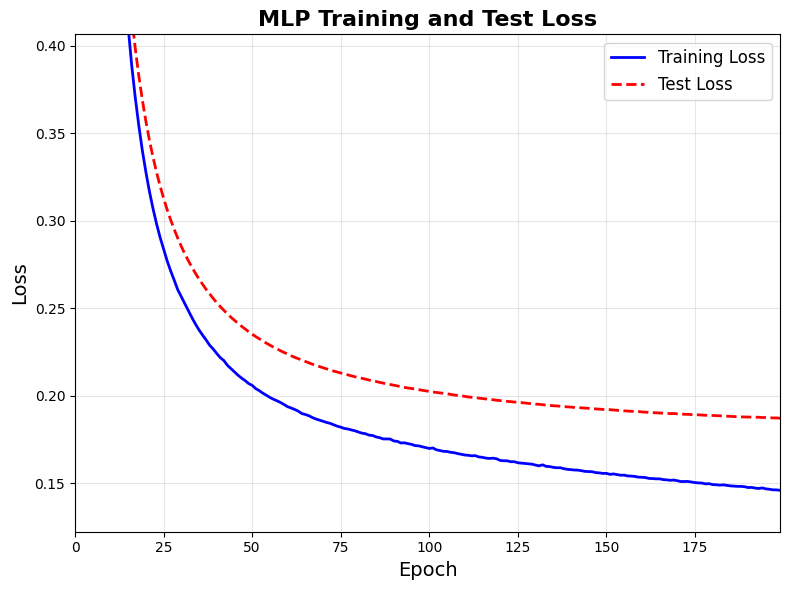

Initial loss: 1.4475
Final loss: 0.1459
Loss reduction: 89.9%


In [16]:
# Plot the learning curve
plot_training_loss(train_loss, test_loss, title='MLP Training and Test Loss')

### d) Now let's compare learning rates.
- Try learning rates of 0.00001, 0.5, and 1.5
- Plot the learning curves for each learning rate.
- Interpret the learning curves, which model did learn best?

*Hint:* You can use the function `plot_loss_curves` to visualize multiple learning curves with custom labels.

In [17]:
# Student Code

In [18]:
# Solution

results = {f"lr_{learning_rate}": 
           { "model": model, "train_loss": train_loss, "test_loss": test_loss, "test_accuracy": test_accuracy } }
learning_rates = [0.00001, 0.5, 1.5]

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=layers)
    train_loss, test_loss, test_accuracy = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=lr, task_type='multiclass')
    results[f"lr_{lr}"] = { "model": model, "train_loss": train_loss, "test_loss": test_loss, "test_accuracy": test_accuracy }


Training with learning rate: 1e-05
=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     1.6428 |    1.6492 |   0.2306 | 0.000010
   20 |     1.6049 |    1.6137 |   0.2727 | 0.000010
   40 |     1.5665 |    1.5775 |   0.2794 | 0.000010
   60 |     1.5294 |    1.5424 |   0.3004 | 0.000010
   80 |     1.4937 |    1.5086 |   0.3082 | 0.000010
  100 |     1.4593 |    1.4760 |   0.3160 | 0.000010
  120 |     1.4264 |    1.4447 |   0.3259 | 0.000010
  140 |     1.3948 |    1.4145 |   0.3481 | 0.000010
  160 |     1.3646 |    1.3857 |   0.4091 | 0.000010
  180 |     1.3356 |    1.3579 |   0.4878 | 0.000010
  200 |     1.3075 |    1.3312 |   0.5432 | 0.000010
Training completed!
Final test accuracy: 0.5432

Training with learning rate: 0.5
=== DETECTED TASK TYPE: MUL

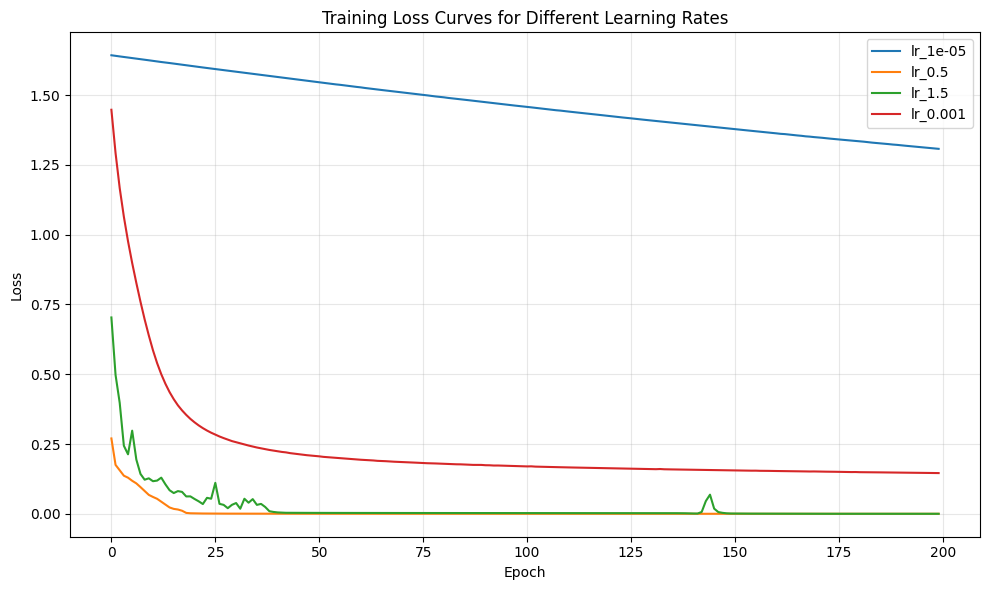

In [19]:
learning_rates.append(learning_rate)  # Include the default learning rate in the list

train_losses = [results[f"lr_{lr}"]["train_loss"] for lr in learning_rates]
plot_loss_curves(train_losses, labels=[f"lr_{lr}" for lr in learning_rates], title = "Training Loss Curves for Different Learning Rates")

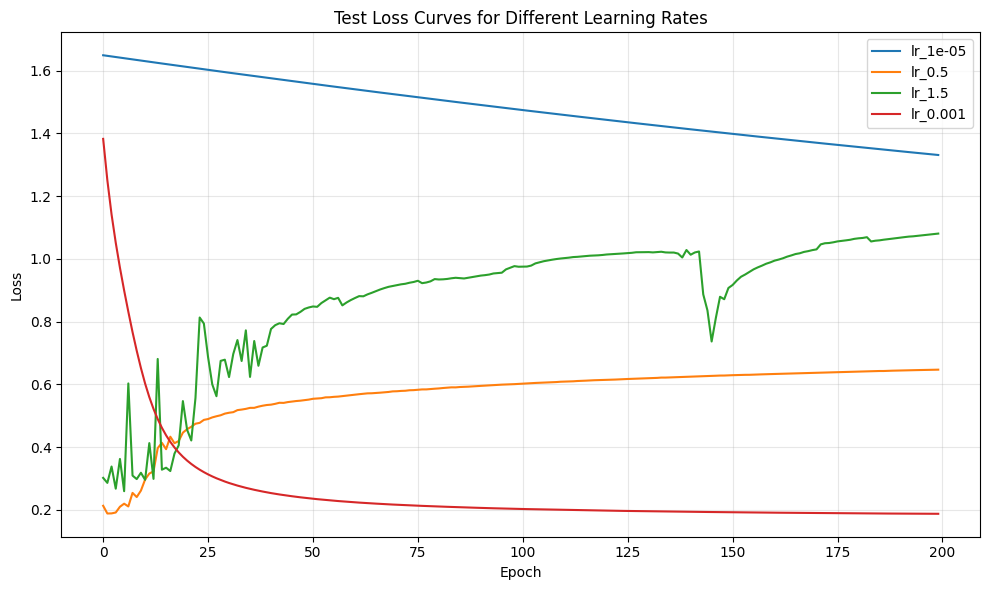

In [20]:
test_losses = [results[f"lr_{lr}"]["test_loss"] for lr in learning_rates]
plot_loss_curves(test_losses, labels=[f"lr_{lr}" for lr in learning_rates], title = "Test Loss Curves for Different Learning Rates")

#### Solution:
The learning curves show that too small learning rates do not converge well, while too large learning rates quickly lead to overfitting. A medium sized learning rate (0.001) provides a good balance, allowing the model to learn effectively without overfitting too quickly.

### e) Let's increase the width (number of neurons) of the hidden layer.
- Use 10000 neurons in the hidden layer.
- Use the best learning rate from the previous task and compare the two models.
- How does the accuracy change?

*Note:* We don't have analyzed the accuracy yet, so you can just compare the loss curves.

In [21]:
# Student Code

In [22]:
# Define Model
hidde_size = 100000
wide_model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=layers)

In [23]:
# Train model
learning_rate = 0.001
test_loss, train_loss, test_accuracy = train_model(wide_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     1.5378 |    1.4600 |   0.4878 | 0.001000
   20 |     0.3529 |    0.3789 |   0.8891 | 0.001000
   40 |     0.2299 |    0.2570 |   0.9080 | 0.001000
   60 |     0.1980 |    0.2259 |   0.9047 | 0.001000
   80 |     0.1827 |    0.2119 |   0.9069 | 0.001000
  100 |     0.1729 |    0.2039 |   0.9124 | 0.001000
  120 |     0.1656 |    0.1982 |   0.9180 | 0.001000
  140 |     0.1600 |    0.1943 |   0.9191 | 0.001000
  160 |     0.1554 |    0.1911 |   0.9213 | 0.001000
  180 |     0.1511 |    0.1888 |   0.9213 | 0.001000
  200 |     0.1472 |    0.1870 |   0.9235 | 0.001000
Training completed!
Final test accuracy: 0.9235


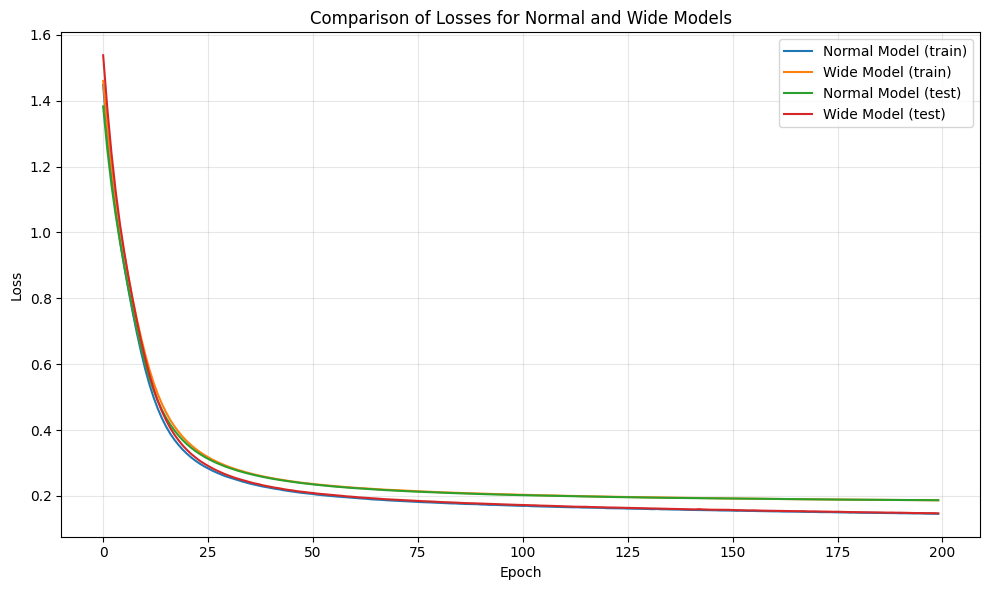

In [24]:
# Plot comparison of losses
losses = [results[f"lr_{learning_rate}"]["train_loss"], train_loss, results[f"lr_{learning_rate}"]["test_loss"], test_loss]
labels = [f"Normal Model (train)", "Wide Model (train)", f"Normal Model (test)", "Wide Model (test)"]

plot_loss_curves(losses, labels=labels, title="Comparison of Losses for Normal and Wide Models")

#### Solution:

Models performed very similar. Seems not to have to big of an impact

### f) Next investigate the depth of the model.
- Fit a new model with three hidden layers with 100 neurons each.
- Compare the initial model to the new one.
- How does the accuracy change?
- Does the new model take longer to train?

In [25]:
# Student Code

In [26]:
# Define model
num_layers = 3
hidden_size = 100

deep_model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers)

In [27]:
# Train the model
learning_rate = 0.001
test_loss, train_loss, test_accuracy = train_model(deep_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     1.5997 |    1.5930 |   0.3780 | 0.001000
   20 |     1.0056 |    1.0232 |   0.6098 | 0.001000
   40 |     0.5584 |    0.5724 |   0.8193 | 0.001000
   60 |     0.2826 |    0.3022 |   0.8891 | 0.001000
   80 |     0.2318 |    0.2500 |   0.9047 | 0.001000
  100 |     0.2022 |    0.2200 |   0.9069 | 0.001000
  120 |     0.1825 |    0.2018 |   0.9069 | 0.001000
  140 |     0.1725 |    0.1927 |   0.9080 | 0.001000
  160 |     0.1655 |    0.1877 |   0.9146 | 0.001000
  180 |     0.1594 |    0.1840 |   0.9180 | 0.001000
  200 |     0.1545 |    0.1816 |   0.9202 | 0.001000
Training completed!
Final test accuracy: 0.9202


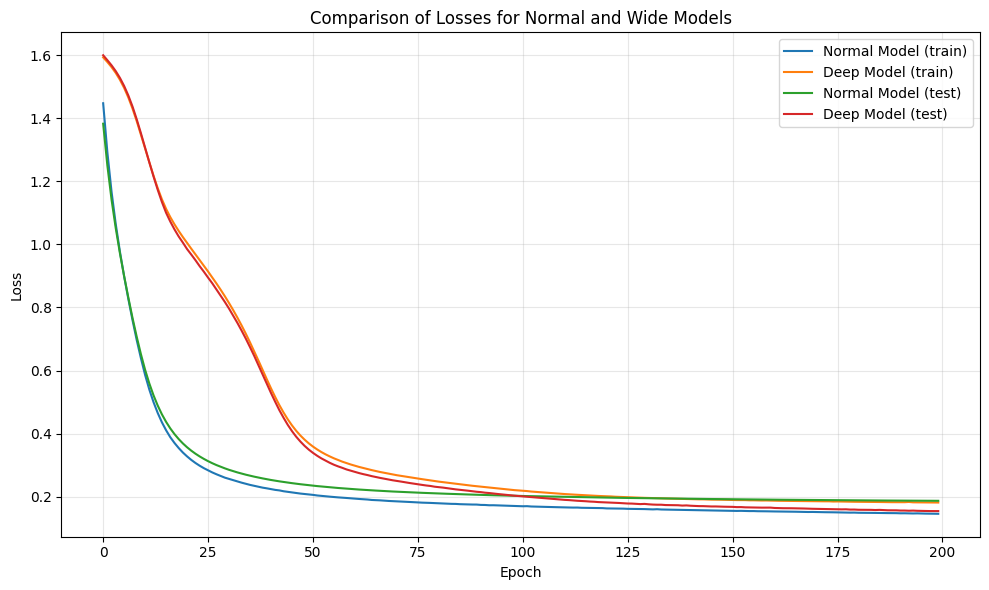

In [28]:
# Plot comparison of losses
losses = [results[f"lr_{learning_rate}"]["train_loss"], train_loss, results[f"lr_{learning_rate}"]["test_loss"], test_loss]
labels = [f"Normal Model (train)", "Deep Model (train)", f"Normal Model (test)", "Deep Model (test)"]

plot_loss_curves(losses, labels=labels, title="Comparison of Losses for Normal and Wide Models")

#### Solution

### g) What can you say about the impact of Width, Depth and learning rate of the model?
- Does the test accuracy change?
- What about training time?
- How does the model perform on the training and test set?

#### Your Answer:

#### Solution:

### g) What can you say about feature importance?
- Is it possible to extract which features are most relevant for the prediction?

*Note:* You don't need to code the feature importance extraction, just discuss the concept.

#### Your Answer:

#### Solution:
In deep learning, feature importance is not as straightforward as in traditional machine learning models like decision trees or linear regression. In general it is difficult, especially for deeper neural networks.

Maybe add a coding part for the students if they're interested.

## 4. Convolutional Neural Networks (CNNs)


In [29]:
# Imports
from helper import loadDermaMNIST

from helper import SimpleMLP
import torch
from helper import SimpleCNN
from helper import evaluate_classification_model
from helper import get_sample
from helper import extract_and_plot_feature_maps
from helper import visualize_model_representations
import timm
from torchvision import transforms



### a) Load the dataset using `loadDermaMNIST()` and explore it.
- What outcome do you want to predict? How many classes are available?
- What predictors are available?


In [30]:
# Student Code

Loading DermaMNIST dataset...
Full dataset sizes:
Training: 7007 images
Test: 2005 images

Using subset of 800 training images
Test set: 200 images


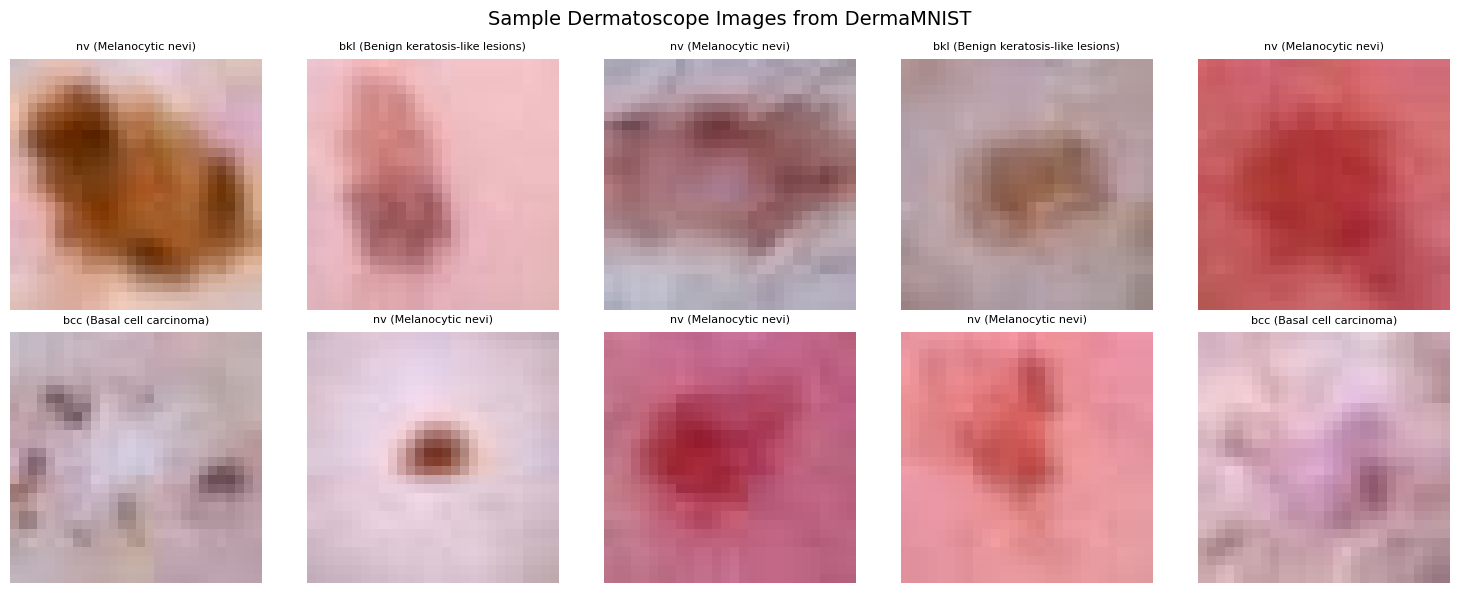

In [31]:
# Load Dataset
X_train, y_train, X_test, y_test, label_names = loadDermaMNIST(train_subset_size=800, test_subset_size=200)

### b) Fit a Multi-Layer Perceptron (MLP) model.
- Use 2 hidden layer with 32 neurons.
- Use SGD with learning rate 0.001.
- How good is the accuracy on the test set?

*Hint:* Use the flattened data as input for the MLP.

In [32]:
# In order to process an image using a MLP, we need to flatten the image (transform the image into a vector)
X_train_flat = X_train.view(X_train.size(0), -1)
X_test_flat = X_test.view(X_test.size(0), -1)

In [33]:
# Student Code

In [34]:
# Define the MLP
input_size = len(X_train_flat[0]) 
output_size = len(torch.unique(y_train))
hidden_size = 32
num_layers = 2

mlp = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers)

In [36]:
# Train the model
learning_rate = 0.001
batch_size=16
num_epochs=200

train_loss, test_loss, _ = train_model(mlp, X_train_flat, y_train, X_test_flat, y_test, learning_rate=learning_rate, batch_size=batch_size, num_epochs=num_epochs, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 7
  Target shape: torch.Size([800, 1])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     0.9897 |    1.0997 |   0.6350 | 0.001000
   20 |     0.9845 |    1.0905 |   0.6350 | 0.001000
   40 |     0.9794 |    1.0847 |   0.6350 | 0.001000
   60 |     0.9744 |    1.0790 |   0.6350 | 0.001000
   80 |     0.9680 |    1.0711 |   0.6300 | 0.001000
  100 |     0.9648 |    1.0694 |   0.6300 | 0.001000
  120 |     0.9578 |    1.0675 |   0.6300 | 0.001000
  140 |     0.9547 |    1.0561 |   0.6300 | 0.001000
  160 |     0.9506 |    1.0517 |   0.6300 | 0.001000
  180 |     0.9454 |    1.0457 |   0.6300 | 0.001000
  200 |     0.9417 |    1.0394 |   0.6300 | 0.001000
Training completed!
Final test accuracy: 0.6300


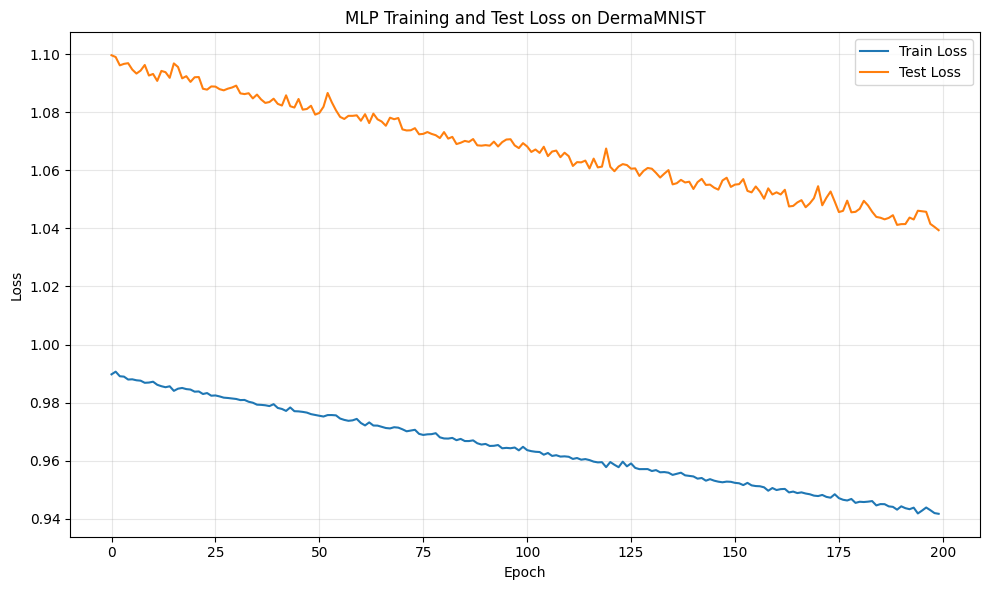

In [37]:
# Plot the learning curve
plot_loss_curves([train_loss, test_loss], ['Train Loss', 'Test Loss'], title='MLP Training and Test Loss on DermaMNIST')

### d) Fit a Convolutional Neural Network (CNN) model.
- Input channels: 3 (the dataset is RGB)
- Use 3 hidden layers with 256 neurons
- Leave the other parameters at their default values

In [38]:
# Student Code

In [39]:
# Define the CNN
output_size = len(torch.unique(y_train))
hidden_size = 256
num_layers = 3

cnn = SimpleCNN(input_channels=3, output_size=output_size, num_fc_layers=num_layers, fc_hidden_size=hidden_size)

In [40]:
# Train the CNN model
batch_size = 16
learning_rate = 0.01

train_loss, test_loss, test_accuracy = train_model(cnn, X_train, y_train, X_test, y_test, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 7
  Target shape: torch.Size([800, 1])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     1.8785 |    1.8184 |   0.6350 | 0.010000
   20 |     1.1036 |    1.2232 |   0.6350 | 0.010000
   40 |     1.0636 |    1.1797 |   0.6350 | 0.010000
   60 |     1.0157 |    1.1307 |   0.6350 | 0.010000
   80 |     0.9926 |    1.0977 |   0.6350 | 0.010000
  100 |     0.9798 |    1.0714 |   0.6350 | 0.010000
  120 |     0.9571 |    1.0478 |   0.6350 | 0.010000
  140 |     0.9422 |    1.0209 |   0.6350 | 0.010000
  160 |     0.9290 |    1.0020 |   0.6350 | 0.010000
  180 |     0.9244 |    0.9854 |   0.6400 | 0.010000
  200 |     0.9133 |    0.9746 |   0.6300 | 0.010000
Training completed!
Final test accuracy: 0.6300


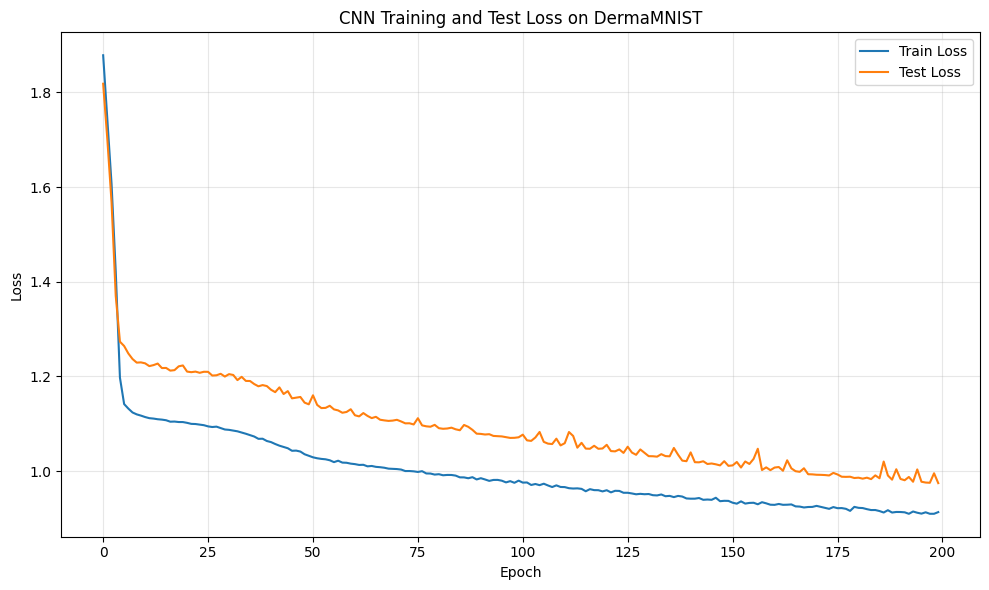

In [41]:
# Plot the learning curve
plot_loss_curves([train_loss, test_loss], ['Train Loss', 'Test Loss'], title='CNN Training and Test Loss on DermaMNIST')

### e) Visualize intermediate representations of the CNN.
- What do you observe?

In [42]:
# Student Code

Analyzing 100 test samples
Flattened Conv Features: (100, 3136)
FC1 Layer Representations: (100, 256)
FC2 Layer Representations: (100, 256)
Output Layer: (100, 7)


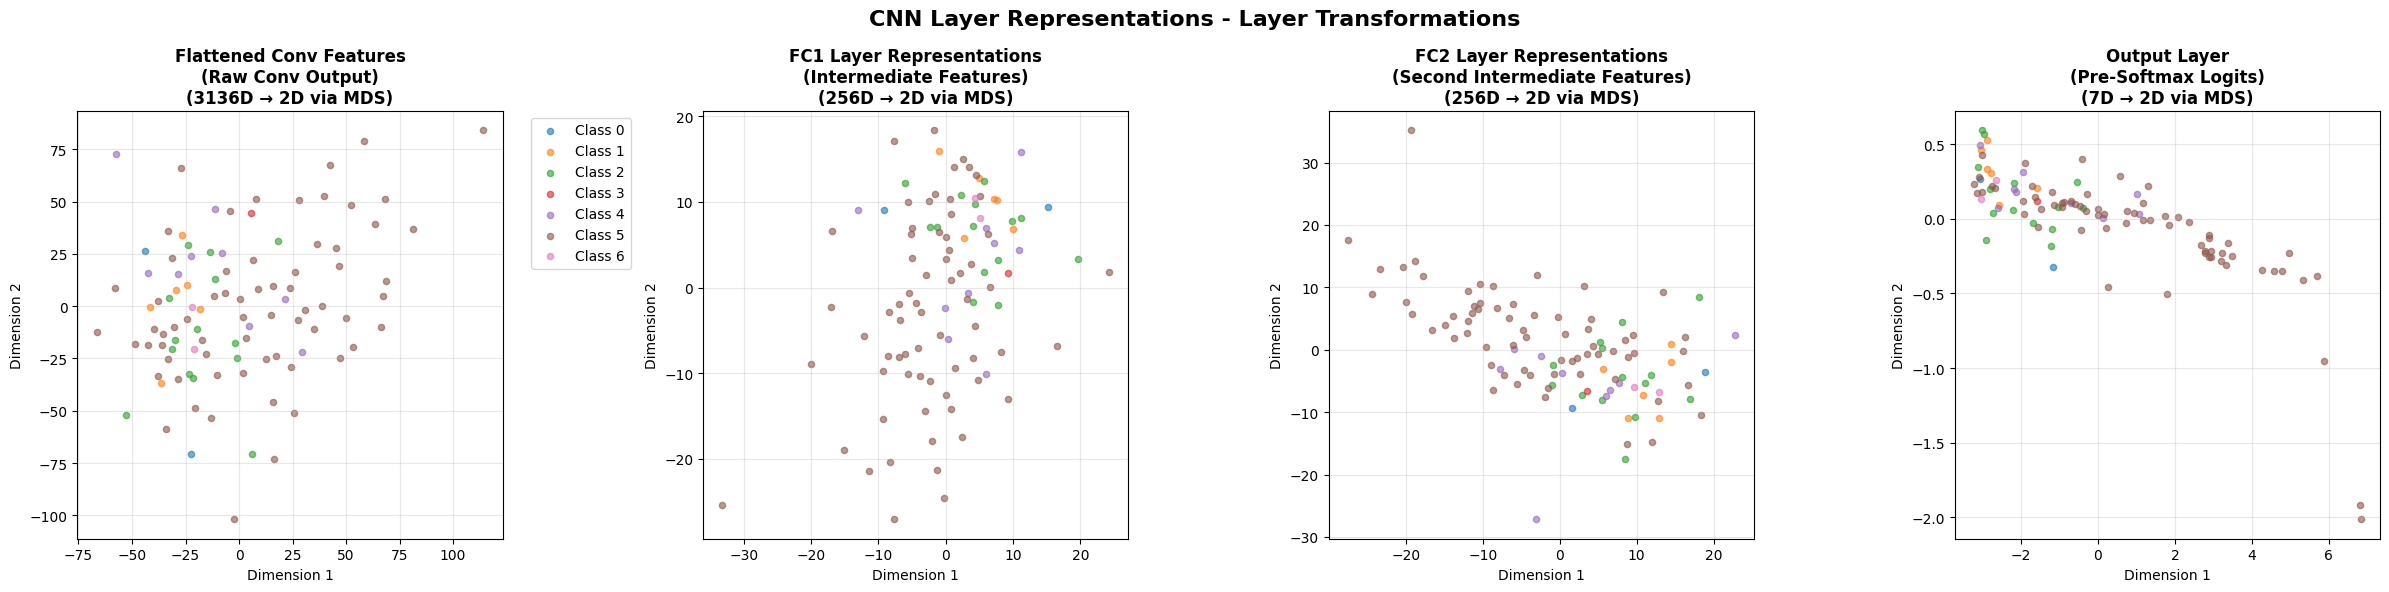

In [43]:
# Solution
visualize_model_representations(cnn, X_test, y_test, model_type='cnn', num_samples=100)

### f) Now do the same for the MLP model.
- Do you see differences in the representations?

In [44]:
# Student Code

Analyzing 100 test samples
Input Layer: (100, 2352)
Hidden Layer 1: (100, 32)
Hidden Layer 2: (100, 32)
Output Layer: (100, 7)


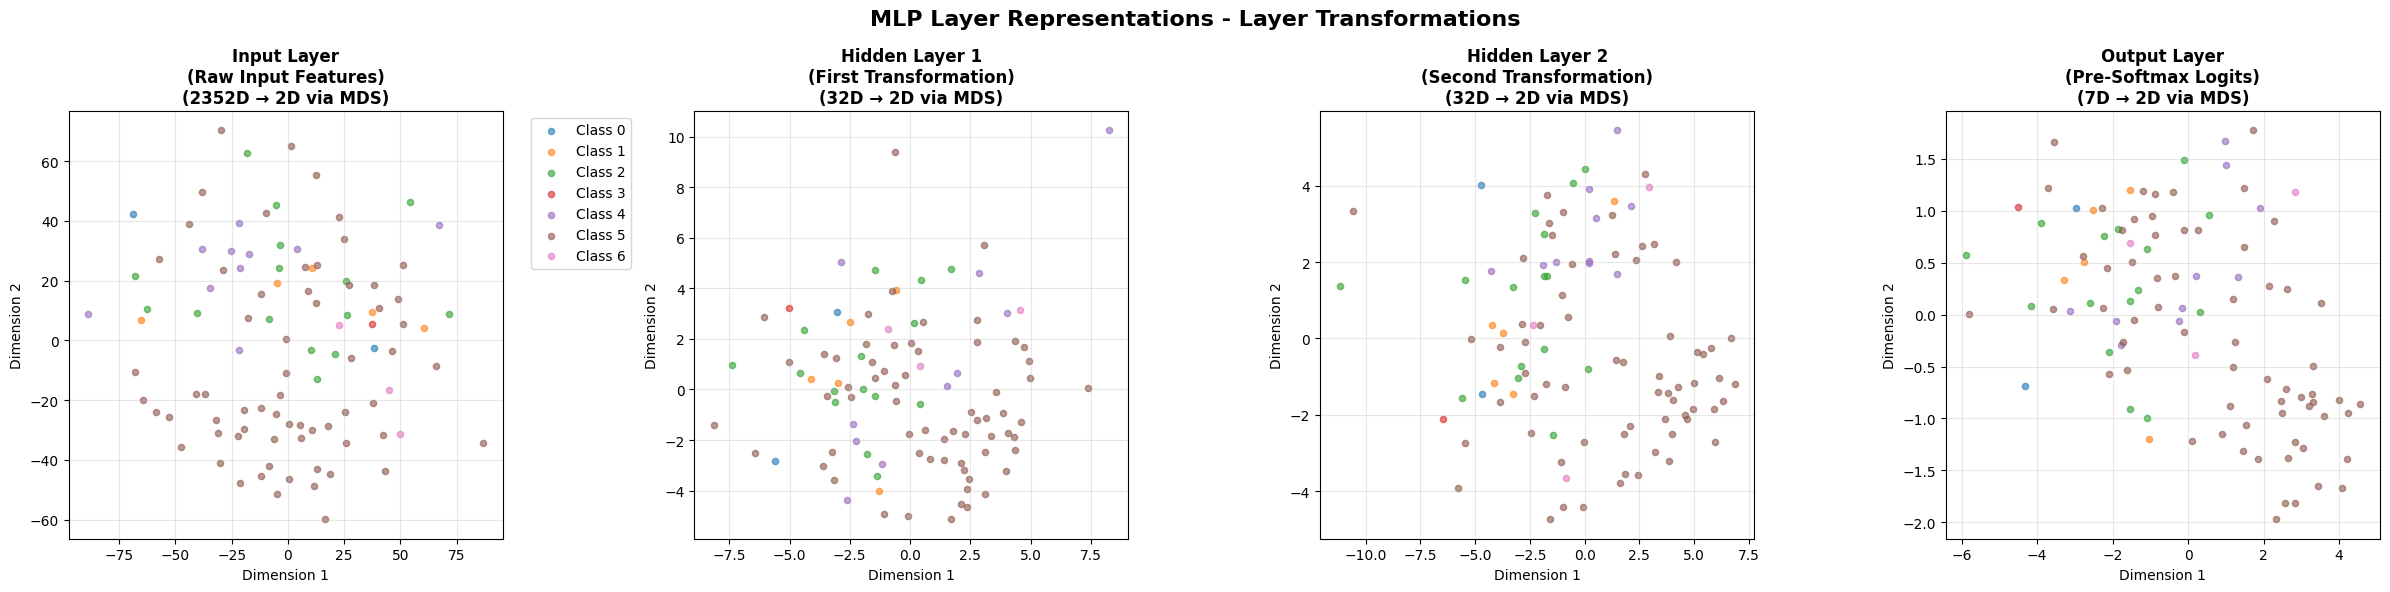

In [45]:
visualize_model_representations(mlp, X_test_flat, y_test, model_type='mlp', num_samples=100)

### g) Let's leverage pretrained models.
- Use a pretrained CNN model (*specify*), and try to adapt it to the dataset.

*Hint:* Use the `timm` library from Huggingface to load a pretrained model and adapt it to the dataset.

In [46]:
# Student Code

In [47]:
# get a model
efficientnet_model = timm.create_model('efficientnet_es', pretrained=True, num_classes=output_size)

# Freeze all layers except the classifier
# for param in efficientnet_model.parameters():
#     param.requires_grad = False

# # Only train the classifier head
# for param in efficientnet_model.classifier.parameters():
#     param.requires_grad = True

In [48]:
# Transform the data for EfficientNet

transform_efficientnet = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to EfficientNet input size
    #transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel
    transforms.ToTensor(),  # Convert back to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

X_train, y_train, X_test, y_test, labels = loadDermaMNIST(transform=transform_efficientnet)

Loading DermaMNIST dataset...
Full dataset sizes:
Training: 7007 images
Test: 2005 images

Using subset of 800 training images
Test set: 200 images


Accuracy: 0.1100


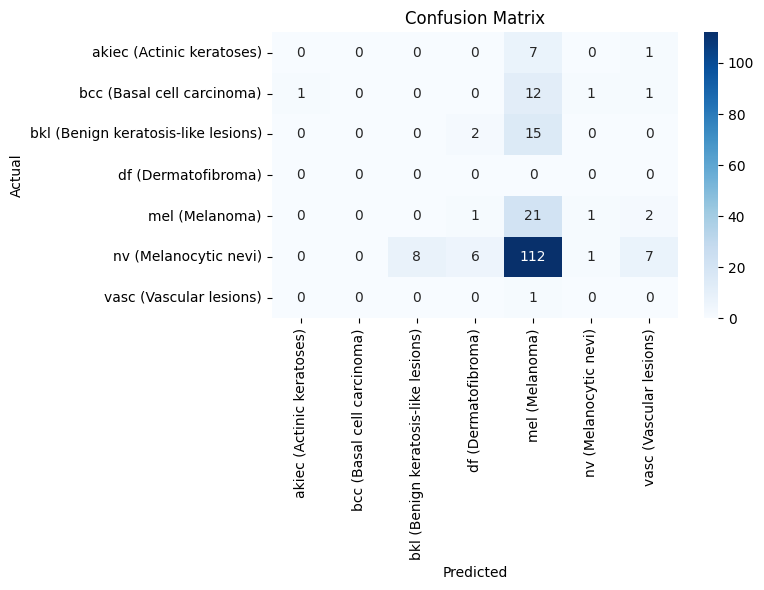

In [49]:
# Out of the box performance

_ = evaluate_classification_model(efficientnet_model, (X_test, y_test), target_names=label_names, batch_size=batch_size)

### h) Fine-Tune the pretrained model.
- How does the accuracy change compared to the previous models?

In [50]:
# Student Code

In [52]:
# Fine Tune model
learning_rate=1e-3
batch_size=16
num_epochs=1

train_loss, test_loss, test_accuracy = train_model(efficientnet_model, X_train, y_train, X_test, y_test, learning_rate=learning_rate, batch_size=batch_size, num_epochs=num_epochs, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 7
  Target shape: torch.Size([800, 1])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     3.1341 |    3.0906 |   0.1550 | 0.001000
Training completed!
Final test accuracy: 0.1550


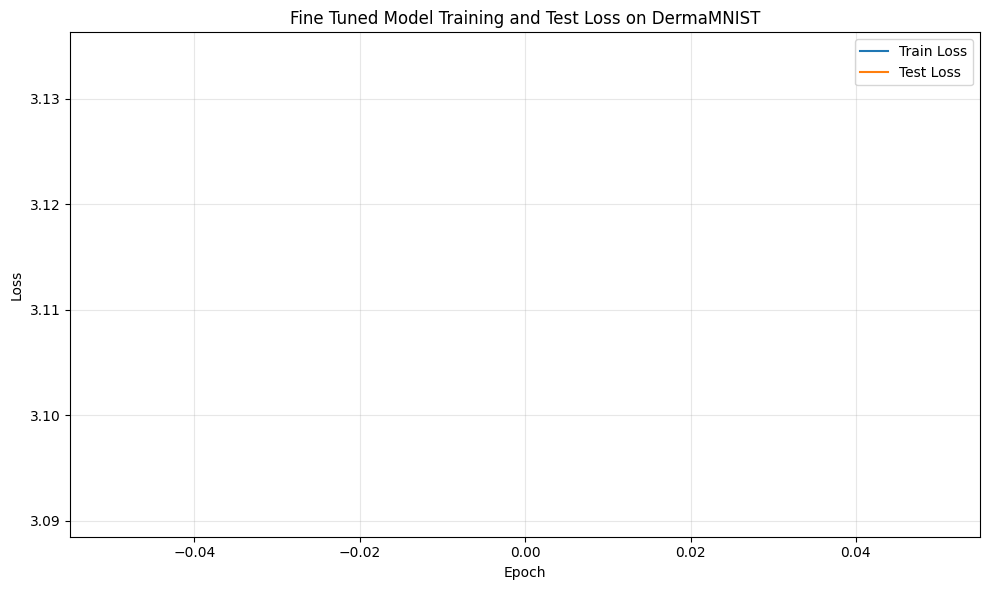

In [53]:
# Plot the learning curve
plot_loss_curves([train_loss, test_loss], ['Train Loss', 'Test Loss'], title='Fine Tuned Model Training and Test Loss on DermaMNIST')

Accuracy: 0.1550


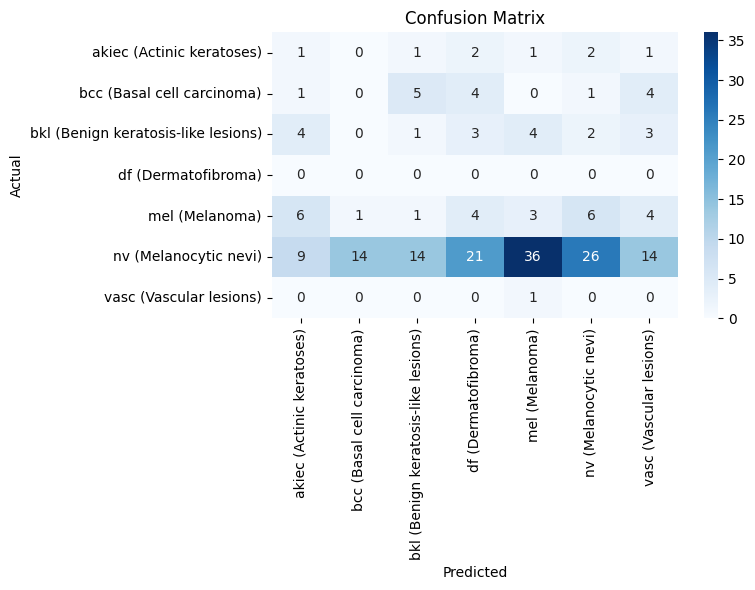

In [54]:
_ = evaluate_classification_model(efficientnet_model, (X_test, y_test), target_names=labels, batch_size=batch_size)

## 5. Text Language Models

In [55]:
# Imports
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

from helper import prepare_data_for_textAnalysis, evaluate_classification_model, train_language_model


### a) Load the dataset `suicidal_ideation_detection.csv` and explore it.
- What outcome do you want to predict? How many classes are available?
- What predictors are available?

In [56]:
# Student Code

In [57]:
# Solution
df = pd.read_csv('suicidal_ideation_detection.csv')

In [58]:
print(df.shape)
df.head()

(15477, 2)


,Label,text
0,Non-Suicidal,I'm looking for a girl I've met at the Polish ...
1,Non-Suicidal,I got a guy kicked off a domestic flight today...
2,Non-Suicidal,"My youngest got in school suspension, I’m so p..."
3,Non-Suicidal,"I'm a cashier who switched from ""sir/mam"" to ""..."
4,Non-Suicidal,My whole class complimented me and didn’t real...


In [59]:
# Check for categorical features and their values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15477 entries, 0 to 15476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   15477 non-null  object
 1   text    15477 non-null  object
dtypes: object(2)
memory usage: 242.0+ KB
None


In [60]:
print(df['Label'].unique())
print(df['Label'].value_counts())

['Non-Suicidal' 'Suicidal']
Label
Non-Suicidal    8202
Suicidal        7275
Name: count, dtype: int64


In [61]:
# TODO: Maybe make this easier
def clean_data(df):
    df_clean = df.dropna(subset=['text', 'Label']).copy()
    df_clean['text'] = df_clean['text'].astype(str).str.strip()
    df_clean = df_clean[df_clean['text'].str.len() > 0]
    df_clean['label'] = (df_clean['Label'] == 'Suicicdal').astype(int)
    return df_clean

#df = clean_data(df)

In [62]:
# Prepare data for modeling
X = df['text']
y = (df['Label'] == 'Suicidal').astype(int)

### b) Load the pretrained Language Model from HuggingFace.

*Hint:* Use the pretrained model `prajjwal1/bert-tiny`, as we did in the Handson.

In [63]:
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(y.unique()))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### c) Prepare the data for text Analysis

In [64]:
train_dataset, test_dataset = prepare_data_for_textAnalysis(X, y, tokenizer)

Training samples: 12381
Validation samples: 3096
Train labels: [6561 5820]
Val labels: [1641 1455]
Tokenizing training data...
Tokenizing validation data...
Tokenization complete!


### d) Fine-tune the model on the training set.

In [65]:
# Train the model
num_epochs = 1

trained_model, train_losses, val_accuracies, final_predictions, final_true_labels = train_language_model(
    model, train_dataset, test_dataset, epochs=num_epochs
)

Training batches: 774
Validation batches: 194
Using device: cpu
Epoch 1/1, Batch 50/774, Loss: 0.4095
Epoch 1/1, Batch 100/774, Loss: 0.1480
Epoch 1/1, Batch 150/774, Loss: 0.1807
Epoch 1/1, Batch 200/774, Loss: 0.8878
Epoch 1/1, Batch 250/774, Loss: 0.2647
Epoch 1/1, Batch 300/774, Loss: 0.4097
Epoch 1/1, Batch 350/774, Loss: 0.0531
Epoch 1/1, Batch 400/774, Loss: 0.4132
Epoch 1/1, Batch 450/774, Loss: 0.3805
Epoch 1/1, Batch 500/774, Loss: 0.1218
Epoch 1/1, Batch 550/774, Loss: 0.2972
Epoch 1/1, Batch 600/774, Loss: 0.2648
Epoch 1/1, Batch 650/774, Loss: 0.4662
Epoch 1/1, Batch 700/774, Loss: 0.3756
Epoch 1/1, Batch 750/774, Loss: 0.3700
Epoch 1/1
  Train Loss: 0.3127
  Val Accuracy: 0.8992
--------------------------------------------------


### e) Evaluate the model on the test set, after fine-tuning.
- How does the accuracy change compared to the previous models?

Accuracy: 0.8992


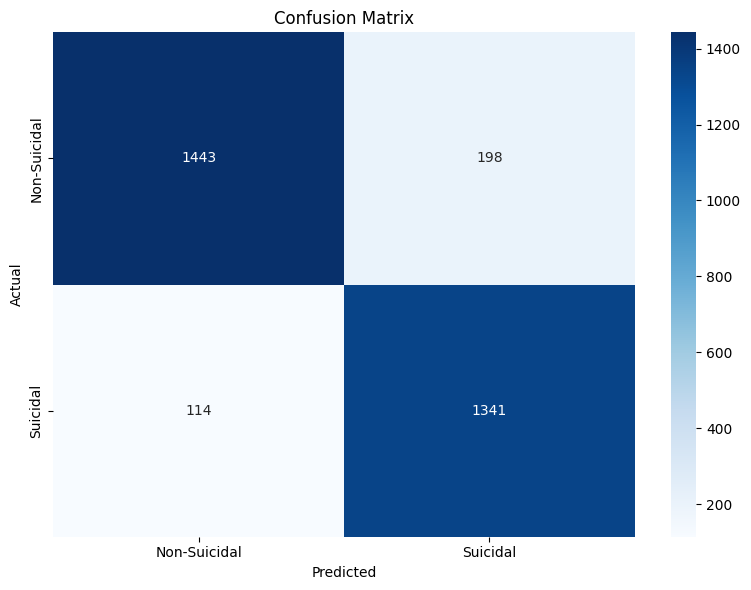

In [66]:
predictions, true_labels = evaluate_classification_model(trained_model, test_dataset, target_names=['Non-Suicidal', 'Suicidal'])

### f) Interpret the results. Would you trust such a model?

#### Your Answer:

#### Solution:
Trust in the model depends on its accuracy, confusion matrix, and the context of use. If the model shows high accuracy and balanced performance across all classes (few false positives/negatives), it may be suitable for supporting decisions. However, for sensitive tasks like suicidal ideation detection, I would not fully trust the model without further validation, explainability, and human oversight. Models can make mistakes, and ethical considerations are critical. Always use such models as decision support, not as the sole decision-maker.